In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In questo notebook verranno fatti i grafici ufficiali da mettere nella tesi.

In [6]:
massr = np.array(['0.1', '0.33', '0.5', '1', '2', '3', '10'])
par_rag = 0.999

<center>

# <span style="color:blue;"> Condizione iniziale </span>

<center>

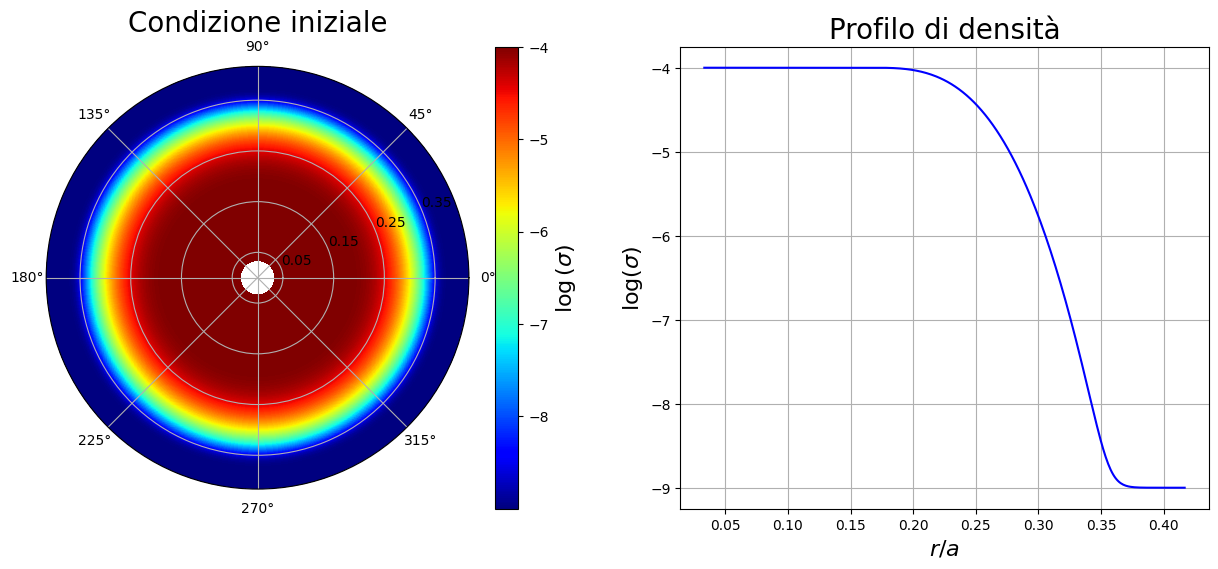

In [4]:
fig = plt.figure(figsize=(15, 6))

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 1152)
r = np.linspace(0.4/12, 5.0/12, 384)
Theta, R = np.meshgrid(theta, r)

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
rho = np.fromfile("../Simulazioni/Alpha-3/NoEcc/MR0.33/gasdens0.dat").reshape(384,1152)
cax = ax1.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmax =-4)
cb = plt.colorbar(cax, label=r'$\log{(\sigma)}$')
cb.set_label(r'$\log{(\sigma)}$', fontsize = 16)
ax1.set_rmin(0)
ax1.set_rmax(5.0/12)
ax1.set_title('Condizione iniziale', fontsize = 20)

#Imposto scala raggi
scala_raggi_desiderati = [0.05, 0.15, 0.25, 0.35]
ax1.set_yticks(scala_raggi_desiderati)


#Grafico 2
ax2 = fig.add_subplot(1, 2, 2)
den_sup = np.zeros(384)

#Determino andamento della densità superficiale
for i in range(0, 384):
    appo = 0
    for j in range(0, 1152):
        appo += np.log10(rho[i, j])

    appo = appo/1152
    den_sup[i] = appo

ax2.plot(np.linspace(0.4/12, 5.0/12, 384), den_sup[:], color = 'blue')
ax2.set_title('Profilo di densità', fontsize = 20)
ax2.set_xlabel(r'$r/a$', fontsize = 16)
ax2.set_ylabel(r'$\log(\sigma)$', fontsize = 16)
ax2.grid(True)

plt.show()

<center>

# <span style="color:blue;"> Creazione cavità artificiale </span>

<center>

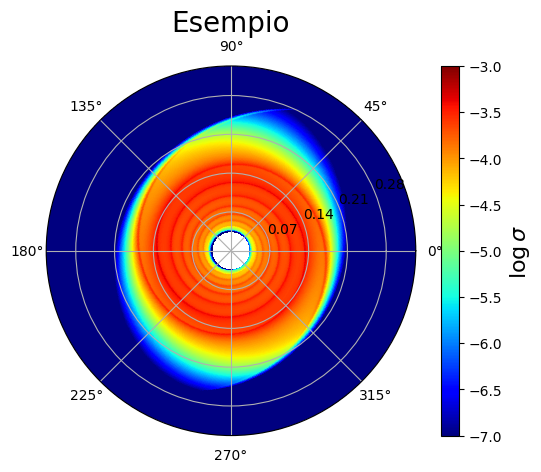

In [6]:
rho = np.fromfile("../Simulazioni/Alpha-3/NoEcc/MR0.33/gasdens100.dat").reshape(384,1152)

# Creare un grafico in coordinate polari
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

# Imposto raggio max scala
ax.set_rmax(4.0/12)

#Creo griglia polare
theta = np.linspace(-np.pi, np.pi, 1152)
r = np.linspace(0.4/12, 4.0/12, 385)
r_plot = np.zeros(384)

for i in range(0, len(r_plot)):
    r_plot[i] = (r[i+1] + r[i])/2

# Creare una griglia di valori R e Theta
Theta, R = np.meshgrid(theta, r_plot)
cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
cb = plt.colorbar(cax, label=r'$\log{\sigma}$')
cb.set_label(r'$\log{\sigma}$', fontsize = 16)

#Imposto scala raggi
scala_raggi_desiderati = [0.07, 0.14, 0.21, 0.28]
ax.set_yticks(scala_raggi_desiderati)
ax.set_title(r'Esempio', fontsize = 20)

# Mostrare il grafico
plt.show()

<center>

# <span style="color:blue;"> Sull'utilizzo del damping </span>

<center>

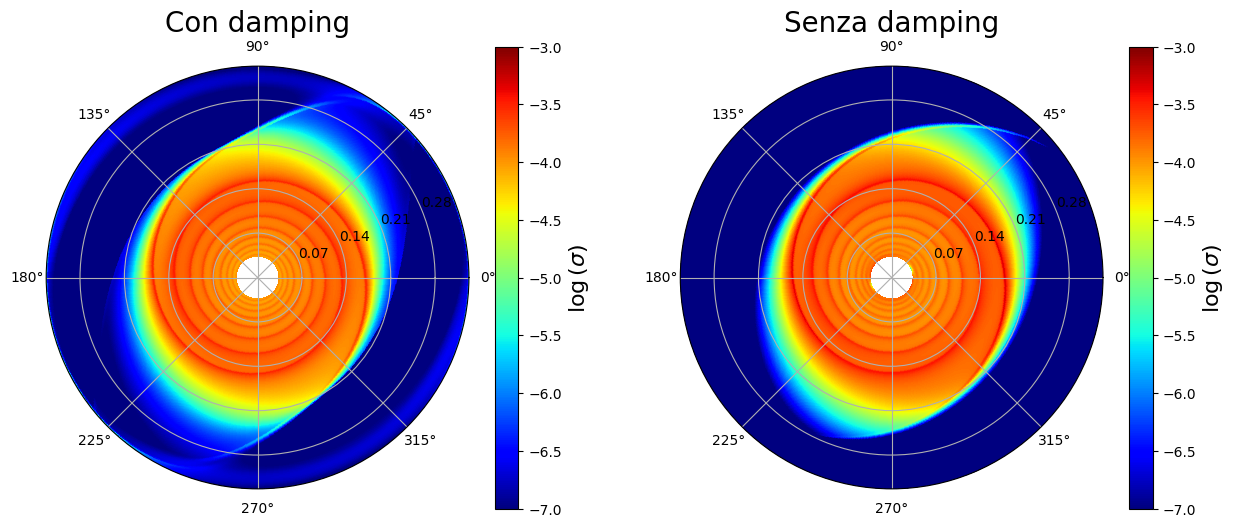

In [5]:
fig = plt.figure(figsize=(15, 6))

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 1152)
r = np.linspace(0.4/12, 4.0/12, 384)
Theta, R = np.meshgrid(theta, r)

#--------------------------------------------#
#               Primo grafico                #
#--------------------------------------------#
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
rho = np.fromfile("../Analisi/Dati/Sistema3/QuartaRun/SiDump/gasdens20.dat").reshape(384,1152)
cax = ax1.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
cb = plt.colorbar(cax, label=r'$\log{(\sigma)}$')
cb.set_label(r'$\log{(\sigma)}$', fontsize = 16)
ax1.set_rmin(0)
ax1.set_rmax(4.0/12)
ax1.set_title('Con damping', fontsize = 20)

#Imposto scala raggi
scala_raggi_desiderati = [0.07, 0.14, 0.21, 0.28]
ax1.set_yticks(scala_raggi_desiderati)


#--------------------------------------------#
#              Secondo grafico               #
#--------------------------------------------#
ax2 = fig.add_subplot(1, 2, 2, projection='polar')
rho = np.fromfile("../Analisi/Dati/Sistema3/QuartaRun/NoDump/gasdens20.dat").reshape(384,1152)
cax = ax2.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
cb = plt.colorbar(cax, label=r'$\log{(\sigma)}$')
cb.set_label(r'$\log{(\sigma)}$', fontsize = 16)
ax2.set_rmin(0)
ax2.set_rmax(4.0/12)
ax2.set_title('Senza damping', fontsize = 20)

#Imposto scala raggi
scala_raggi_desiderati = [0.07, 0.14, 0.21, 0.28]
ax2.set_yticks(scala_raggi_desiderati)



plt.show()

<center>

# <span style="color:blue;"> Test dell'outer boundary</span>

<center>

In [42]:
mas_dis = np.zeros(401)


for k in range(0, 401):
    rho = np.fromfile("../Analisi/Dati/Sistema3/QuintaRun/gasdens" + str(k) + ".dat").reshape(128,384)

    massa = 0
    for i in range(0,128):
        #Calcolo area della singola sezione
        area = np.pi * (pow(((i+1)*(4-0.4)/128 + 0.4),2)-pow((i*(4-0.4)/128 + 0.4),2))
        area = area/384

        for j in range(0, 384):
            massa += area * rho[i, j]
        
    mas_dis[k] = massa

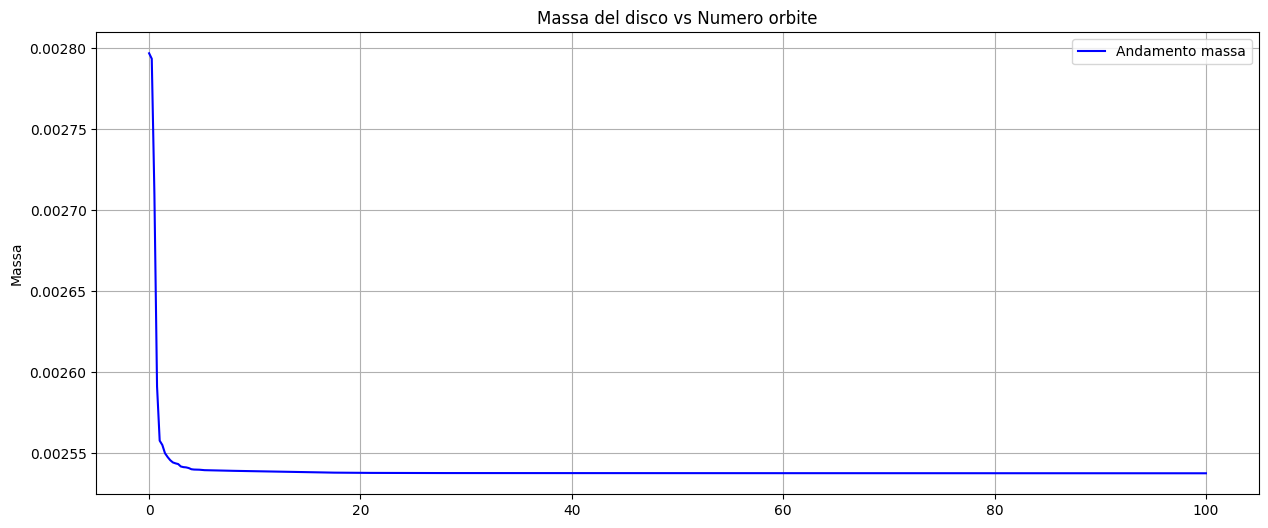

In [43]:
fig = plt.figure(figsize=(15, 6))

#Asse x grafici
x = np.zeros(401)
for i in range(0, len(x)):
    x[i] = i

#Grafico 1
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x/4, mas_dis, color = 'blue', label = 'Andamento massa')
ax1.set_title('Massa del disco vs Numero orbite')
ax1.set_ylabel('Massa')
ax1.grid(True)
ax1.legend()

plt.show()

<center>

# <span style="color:blue;"> Profilo di densità del disco </span>

<center>

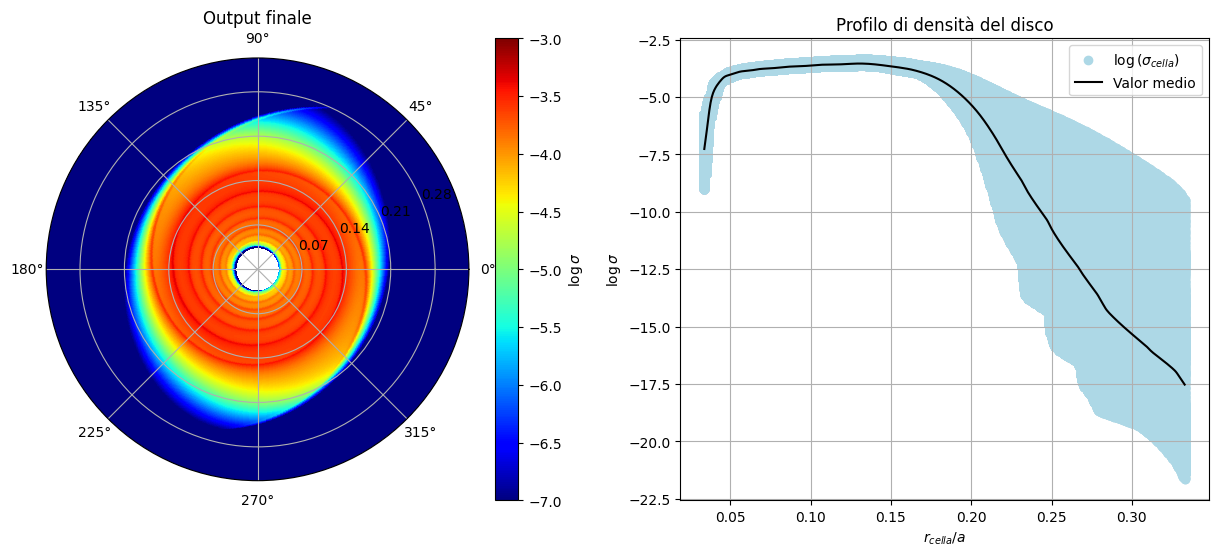

In [87]:
fig = plt.figure(figsize=(15, 6))

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 1152)
r = np.linspace(0.4, 4.0, 385)
r_plot = np.linspace((r[0] + r[1])/2,(r[383] + r[384])/2,384)
Theta, R = np.meshgrid(theta, r_plot/12)

rho = np.fromfile("../Simulazioni/Alpha-3/NoEcc/MR0.33/gasdens100.dat").reshape(384,1152)

#--------------------------------#
#         Calcolo massa          #
#--------------------------------#

area = np.zeros((384, 1152))
rcal = np.zeros((384, 1152))

for i in range(0, 384):

    appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
    for j in range(0, 1152):
        area[i, j] = appo
        rcal[i, j] = r_plot[i]

mas = area * rho
rcal = rcal.reshape(384 * 1152)

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
cax = ax1.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin=-7, vmax=-3)
plt.colorbar(cax, label=r'$\log{\sigma}$')
ax1.set_rmin(0)
ax1.set_rmax(4.0/12)
ax1.set_title('Output finale')

#Imposto scala raggi
scala_raggi_desiderati = [0.07, 0.14, 0.21, 0.28]
ax1.set_yticks(scala_raggi_desiderati)


#Grafico 2
ax2 = fig.add_subplot(1, 2, 2)
mas = np.log10(rho).reshape(384 * 1152)
ax2.scatter(rcal/12, mas, color = 'lightblue', label = r'$\log{(\sigma_{cella})}$')

#----------------------------------------------------#
#            Medio per posizione radiale             #
#----------------------------------------------------#
M = []
mas = mas.reshape(384,1152)
for i in range(0, 384):
    M.append(mas[i, :].sum()/len(mas[i, :]))
ax2.plot(r_plot/12, M, color = 'black', label = 'Valor medio')
ax2.set_title('Profilo di densità del disco')
ax2.set_xlabel(r'$r_{cella}/a$')
ax2.set_ylabel(r'$\log{\sigma}$')
ax2.grid(True)
ax2.legend()

plt.show()

<center>

# <span style="color:blue;"> Energia del disco </span>

<center>

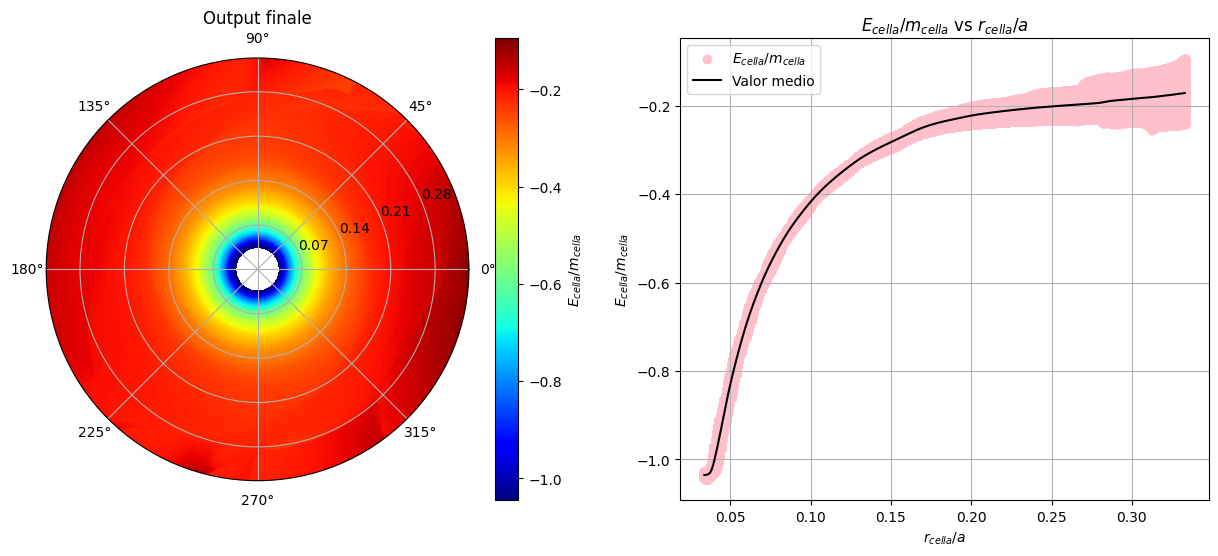

In [88]:
fig = plt.figure(figsize=(15, 6))

rho = np.fromfile("../Simulazioni/Alpha-3/NoEcc/MR0.33/gasdens100.dat").reshape(384,1152)
vx = np.fromfile("../Simulazioni/Alpha-3/NoEcc/MR0.33/gasvx100.dat").reshape(384,1152)
vy = np.fromfile("../Simulazioni/Alpha-3/NoEcc/MR0.33/gasvy100.dat").reshape(384,1152)

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 1152)
r = np.linspace(0.4, 4.0, 385)
r_plot = np.linspace((r[0] + r[1])/2,(r[383] + r[384])/2,384)
Theta, R = np.meshgrid(theta, r_plot/12)

#------------------------------------#
#          Calcolo energia           #
#------------------------------------#
area = np.zeros((384, 1152))
rcal = np.zeros((384, 1152))

for i in range(0, 384):

    appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
    for j in range(0, 1152):
        area[i, j] = appo
        rcal[i, j] = r_plot[i]

mas = rho * area
ene = mas * (0.5 * (vx**2 + vy**2) - 1/rcal)
rcal = rcal.reshape(384 * 1152)

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
cax = ax1.pcolormesh(Theta, R, ene/mas, cmap='jet')
plt.colorbar(cax, label=r'$E_{cella}/m_{cella}$')
ax1.set_rmin(0)
ax1.set_rmax(4.0/12)
ax1.set_title('Output finale')

#Imposto scala raggi
scala_raggi_desiderati = [0.07, 0.14, 0.21, 0.28]
ax1.set_yticks(scala_raggi_desiderati)


#Grafico 2
ax2 = fig.add_subplot(1, 2, 2)
ene = (ene/mas).reshape(384 * 1152)
ax2.scatter(rcal/12, ene, color = 'pink', label = r'$E_{cella}/m_{cella}$')

#----------------------------------------------------#
#            Medio per posizione radiale             #
#----------------------------------------------------#
E = []
ene = ene.reshape(384,1152)
for i in range(0, 384):
    E.append(ene[i, :].sum()/len(ene[i, :]))
ax2.plot(r_plot/12, E, color = 'black', label = 'Valor medio')
ax2.set_title(r'$E_{cella}/m_{cella}$ vs $r_{cella}/a$')
ax2.set_xlabel(r'$r_{cella}/a$')
ax2.set_ylabel(r'$E_{cella}/m_{cella}$')
ax2.grid(True)
ax2.legend()

plt.show()

<center>

# <span style="color:blue;"> Momento angolare del disco </span>

<center>

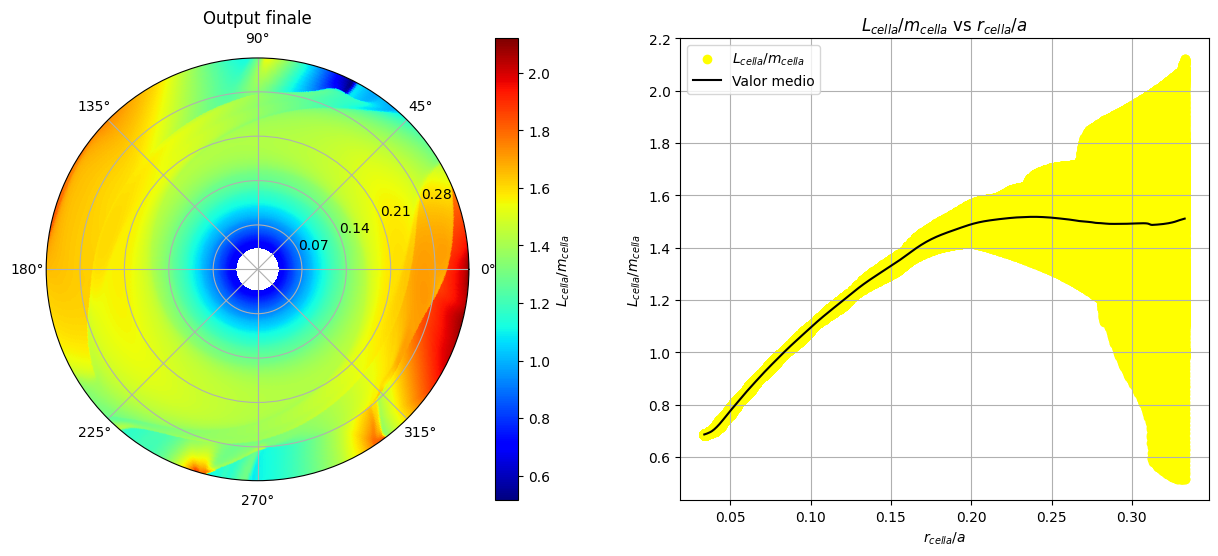

In [89]:
fig = plt.figure(figsize=(15, 6))

rho = np.fromfile("../Simulazioni/Alpha-3/NoEcc/MR0.33/gasdens100.dat").reshape(384,1152)
vx = np.fromfile("../Simulazioni/Alpha-3/NoEcc/MR0.33/gasvx100.dat").reshape(384,1152)
vy = np.fromfile("../Simulazioni/Alpha-3/NoEcc/MR0.33/gasvy100.dat").reshape(384,1152)

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 1152)
r = np.linspace(0.4, 4.0, 385)
r_plot = np.linspace((r[0] + r[1])/2,(r[383] + r[384])/2,384)
Theta, R = np.meshgrid(theta, r_plot/12)

#------------------------------------#
#          Calcolo momargia           #
#------------------------------------#
area = np.zeros((384, 1152))
rcal = np.zeros((384, 1152))

for i in range(0, 384):

    appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
    for j in range(0, 1152):
        area[i, j] = appo
        rcal[i, j] = r_plot[i]

mas = rho * area
moma = mas * rcal * vx
rcal = rcal.reshape(384 * 1152)

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
cax = ax1.pcolormesh(Theta, R, moma/mas, cmap='jet')
plt.colorbar(cax, label=r'$L_{cella}/m_{cella}$')
ax1.set_rmin(0)
ax1.set_rmax(4.0/12)
ax1.set_title('Output finale')

#Imposto scala raggi
scala_raggi_desiderati = [0.07, 0.14, 0.21, 0.28]
ax1.set_yticks(scala_raggi_desiderati)


#Grafico 2
ax2 = fig.add_subplot(1, 2, 2)
moma = (moma/mas).reshape(384 * 1152)
ax2.scatter(rcal/12, moma, color = 'yellow', label = r'$L_{cella}/m_{cella}$')

#----------------------------------------------------#
#            Medio per posizione radiale             #
#----------------------------------------------------#
E = []
moma = moma.reshape(384,1152)
for i in range(0, 384):
    E.append(moma[i, :].sum()/len(moma[i, :]))
ax2.plot(r_plot/12, E, color = 'black', label = 'Valor medio')
ax2.set_title(r'$L_{cella}/m_{cella}$ vs $r_{cella}/a$')
ax2.set_xlabel(r'$r_{cella}/a$')
ax2.set_ylabel(r'$L_{cella}/m_{cella}$')
ax2.grid(True)
ax2.legend()

plt.show()

<center>

# <span style="color:blue;"> Raggio di troncamento </span>

<center>

Il raggio di troncamento del disco è: 0.221


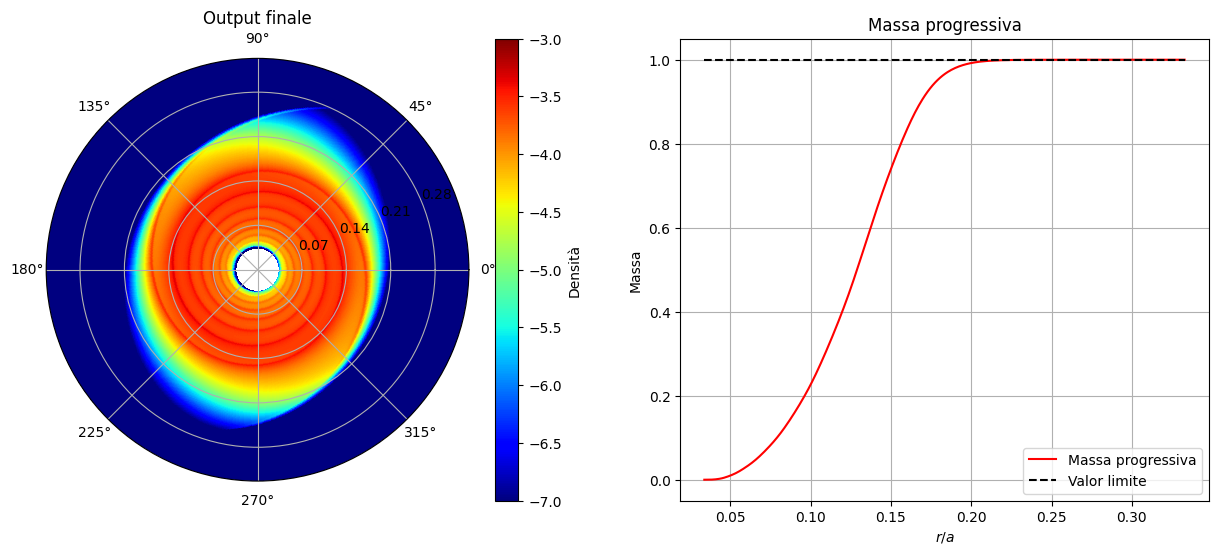

In [90]:
fig = plt.figure(figsize=(15, 6))

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 1152)
r = np.linspace(0.4, 4.0, 385)
r_plot = np.linspace((r[0] + r[1])/2,(r[383] + r[384])/2,384)
Theta, R = np.meshgrid(theta, r_plot/12)

#--------------------------------#
#         Calcolo massa          #
#--------------------------------#

area = np.zeros((384, 1152))
rcal = np.zeros((384, 1152))

for i in range(0, 384):

    appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
    for j in range(0, 1152):
        area[i, j] = appo
        rcal[i, j] = r_plot[i]

mas = area * rho
rcal = rcal.reshape(384 * 1152)

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
rho = np.fromfile("../Simulazioni/Alpha-3/NoEcc/MR0.33/gasdens100.dat").reshape(384,1152)
cax = ax1.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax = -3)
plt.colorbar(cax, label=r'Densità')
ax1.set_rmin(0)
ax1.set_rmax(4.0/12)
ax1.set_title('Output finale')

#Imposto scala raggi
scala_raggi_desiderati = [0.07, 0.14, 0.21, 0.28]
ax1.set_yticks(scala_raggi_desiderati)


#Grafico 2
ax2 = fig.add_subplot(1, 2, 2)
#----------------------------------------------------#
#            Medio per posizione radiale             #
#----------------------------------------------------#
M = []
rcal = rcal.reshape(384,1152)
for i in range(0, 384):
    M.append(mas[rcal <= r_plot[i]].sum())

for i in range(0, 384):
    if M[i] >= M[383] * 0.999:
        print('Il raggio di troncamento del disco è: ' + str(round(r_plot[i]/12.0, 3)))
        break
M = np.array(M)
ax2.plot(r_plot/12, M/M[383], color = 'red', label = 'Massa progressiva')
ax2.plot(r_plot/12, M/M * 0.999, color = 'black', linestyle = '--', label = 'Valor limite')
ax2.set_title('Massa progressiva')
ax2.set_xlabel(r'$r/a$')
ax2.set_ylabel(r'Massa')
ax2.grid(True)
ax2.legend()

plt.show()

<center>

# <span style="color:blue;"> Raggio e semiasse di troncamento </span>

<center>

Il raggio del disco è pari a: 0.222 a
Il semiasse maggiore del disco è pari a: 0.193 a


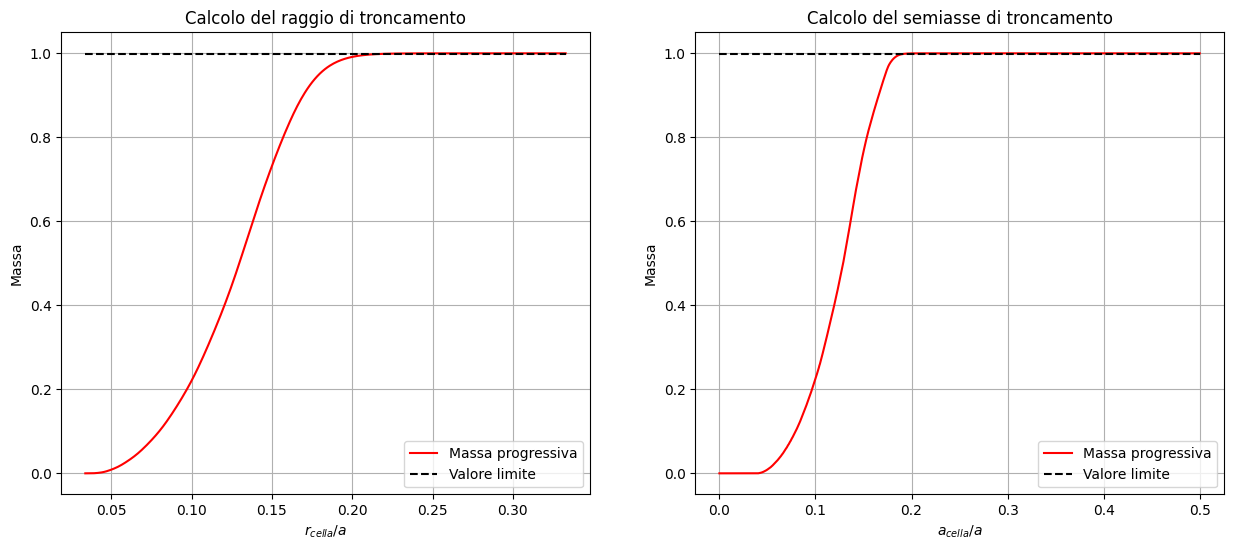

In [99]:
fig = plt.figure(figsize=(15, 6))

rho = np.fromfile("../Simulazioni/Alpha-3/NoEcc/MR0.33/gasdens100.dat").reshape(384,1152)
vx = np.fromfile("../Simulazioni/Alpha-3/NoEcc/MR0.33/gasvx100.dat").reshape(384,1152)
vy = np.fromfile("../Simulazioni/Alpha-3/NoEcc/MR0.33/gasvy100.dat").reshape(384,1152)

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 1152)
r = np.linspace(0.4, 4.0, 385)
r_plot = np.linspace((r[0] + r[1])/2,(r[383] + r[384])/2,384)
Theta, R = np.meshgrid(theta, r_plot/12)

#------------------------------------#
#          Calcolo energia           #
#------------------------------------#
area = np.zeros((384, 1152))
rcal = np.zeros((384, 1152))

for i in range(0, 384):

    appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
    for j in range(0, 1152):
        area[i, j] = appo
        rcal[i, j] = r_plot[i]

m_prog = []
mas = rho * area
ene = mas * (0.5 * (vx**2 + vy**2) - 1/rcal)
sax = - mas/(2 * ene * 12.0)

for i in range(0, 384):
    m_prog.append(mas[rcal < r_plot[i]].sum())

m_prog = np.array(m_prog)
for i in range(0, len(m_prog)):
    if m_prog[i] > 0.999 * m_prog[383]:
        print('Il raggio del disco è pari a: ' +str(round(r_plot[i]/12, 3)) + ' a')
        break


#Grafico 1
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(r_plot/12.0, m_prog/m_prog[383], color = 'red', label = 'Massa progressiva')
y_teo = np.zeros(384)
for i in range(0, len(y_teo)):
    y_teo[i] = 0.999
ax1.plot(r_plot/12.0, y_teo, color = 'black', linestyle = '--', label = 'Valore limite')
ax1.set_title('Calcolo del raggio di troncamento')
ax1.set_xlabel(r'$r_{cella}/a$')
ax1.set_ylabel(r'Massa')
ax1.grid(True)
ax1.legend()

#Grafico 2
ax2 = fig.add_subplot(1, 2, 2)
sax_mag = np.linspace(0, 0.5, 1000)

M = []
for i in range(0, 1000):
    M.append(mas[sax < sax_mag[i]].sum())

for i in range(0, 1000):
    if M[i] > 0.999 * M[999]:
        print('Il semiasse maggiore del disco è pari a: ' +str(round(sax_mag[i], 3)) + ' a')
        break

M = np.array(M)
ax2.plot(sax_mag, M/M[999], color = 'red', label = 'Massa progressiva')
y_teo = np.zeros(1000)
for i in range(0, len(y_teo)):
    y_teo[i] = 0.999
ax2.plot(sax_mag, y_teo, color = 'black', linestyle = '--', label = 'Valore limite')
ax2.set_title('Calcolo del semiasse di troncamento')
ax2.set_xlabel(r'$a_{cella}/a$')
ax2.set_ylabel(r'Massa')
ax2.grid(True)
ax2.legend()

plt.show()

<center>

# <span style="color:blue;"> Eccentricità del disco </span>

<center>

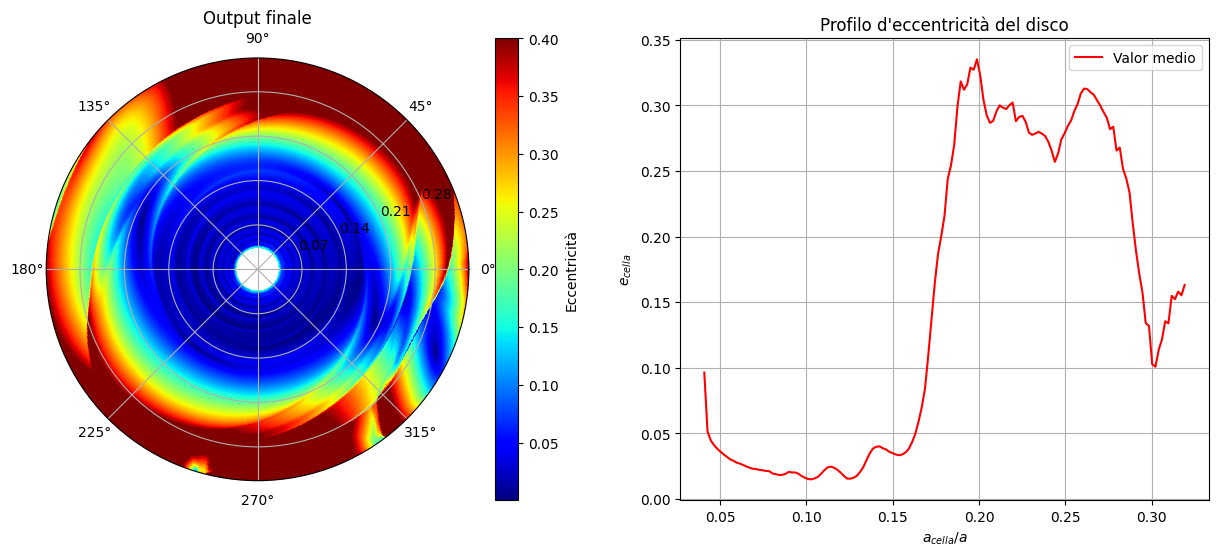

In [110]:
fig = plt.figure(figsize=(15, 6))

rho = np.fromfile("../Simulazioni/Alpha-3/NoEcc/MR0.33/gasdens100.dat").reshape(384,1152)
vx = np.fromfile("../Simulazioni/Alpha-3/NoEcc/MR0.33/gasvx100.dat").reshape(384,1152)
vy = np.fromfile("../Simulazioni/Alpha-3/NoEcc/MR0.33/gasvy100.dat").reshape(384,1152)

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 1152)
r = np.linspace(0.4, 4.0, 385)
r_plot = np.linspace((r[0] + r[1])/2,(r[383] + r[384])/2,384)
Theta, R = np.meshgrid(theta, r_plot/12)

#------------------------------------#
#          Calcolo energia           #
#------------------------------------#
area = np.zeros((384, 1152))
rcal = np.zeros((384, 1152))
uno = np.zeros((384, 1152))
zero = np.zeros((384, 1152))

for i in range(0, 384):

    appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
    for j in range(0, 1152):
        area[i, j] = appo
        rcal[i, j] = r_plot[i]
        uno[i, j] = 1
        zero[i, j] = 0

mas = rho * area
ene = mas * (0.5 * (vx**2 + vy**2) - 1/rcal)
sax = - mas/(2 * ene * 12.0)

ecc = np.sqrt(np.maximum(uno - (rcal * vx)**2/(sax * 12.0), zero))

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
cax = ax1.pcolormesh(Theta, R, ecc, cmap='jet', vmax = 0.4)
plt.colorbar(cax, label=r'Eccentricità')
ax1.set_rmin(0)
ax1.set_rmax(4.0/12)
ax1.set_title('Output finale')

#Imposto scala raggi
scala_raggi_desiderati = [0.07, 0.14, 0.21, 0.28]
ax1.set_yticks(scala_raggi_desiderati)


#Grafico 2
ax2 = fig.add_subplot(1, 2, 2)
sax_mag = np.linspace(0, 0.5, 1000)

M = []
for i in range(0, 1000):
    M.append(mas[sax < sax_mag[i]].sum())

for i in range(0, 1000):
    if M[i] > 0.999 * M[999]:
        ind = i
        break

sax_mag = np.linspace(0.04, 0.32, 150)              #Binno il semi-asse
sax_plot = np.zeros(149)                             #Trovo semiasse per il plot
prof_ecc = np.zeros(149)                             #Profilo eccentricità
for i in range(0, len(sax_plot)):
    sax_plot[i] = (sax_mag[i+1] + sax_mag[i])/2

for i in range(0, len(sax_mag) -1):
    mask = np.logical_and(sax < sax_mag[i+1], sax > sax_mag[i])
    prof_ecc[i] = ecc[mask].sum()/len(ecc[mask])

ax2.plot(sax_plot, prof_ecc, color = 'red', label = 'Valor medio')
ax2.set_title(r"Profilo d'eccentricità del disco")
ax2.set_xlabel(r'$a_{cella}/a$')
ax2.set_ylabel(r'$e_{cella}$')
ax2.grid(True)
ax2.legend()

plt.show()

<center>

# <span style="color:blue;"> Riassunto </span>

<center>

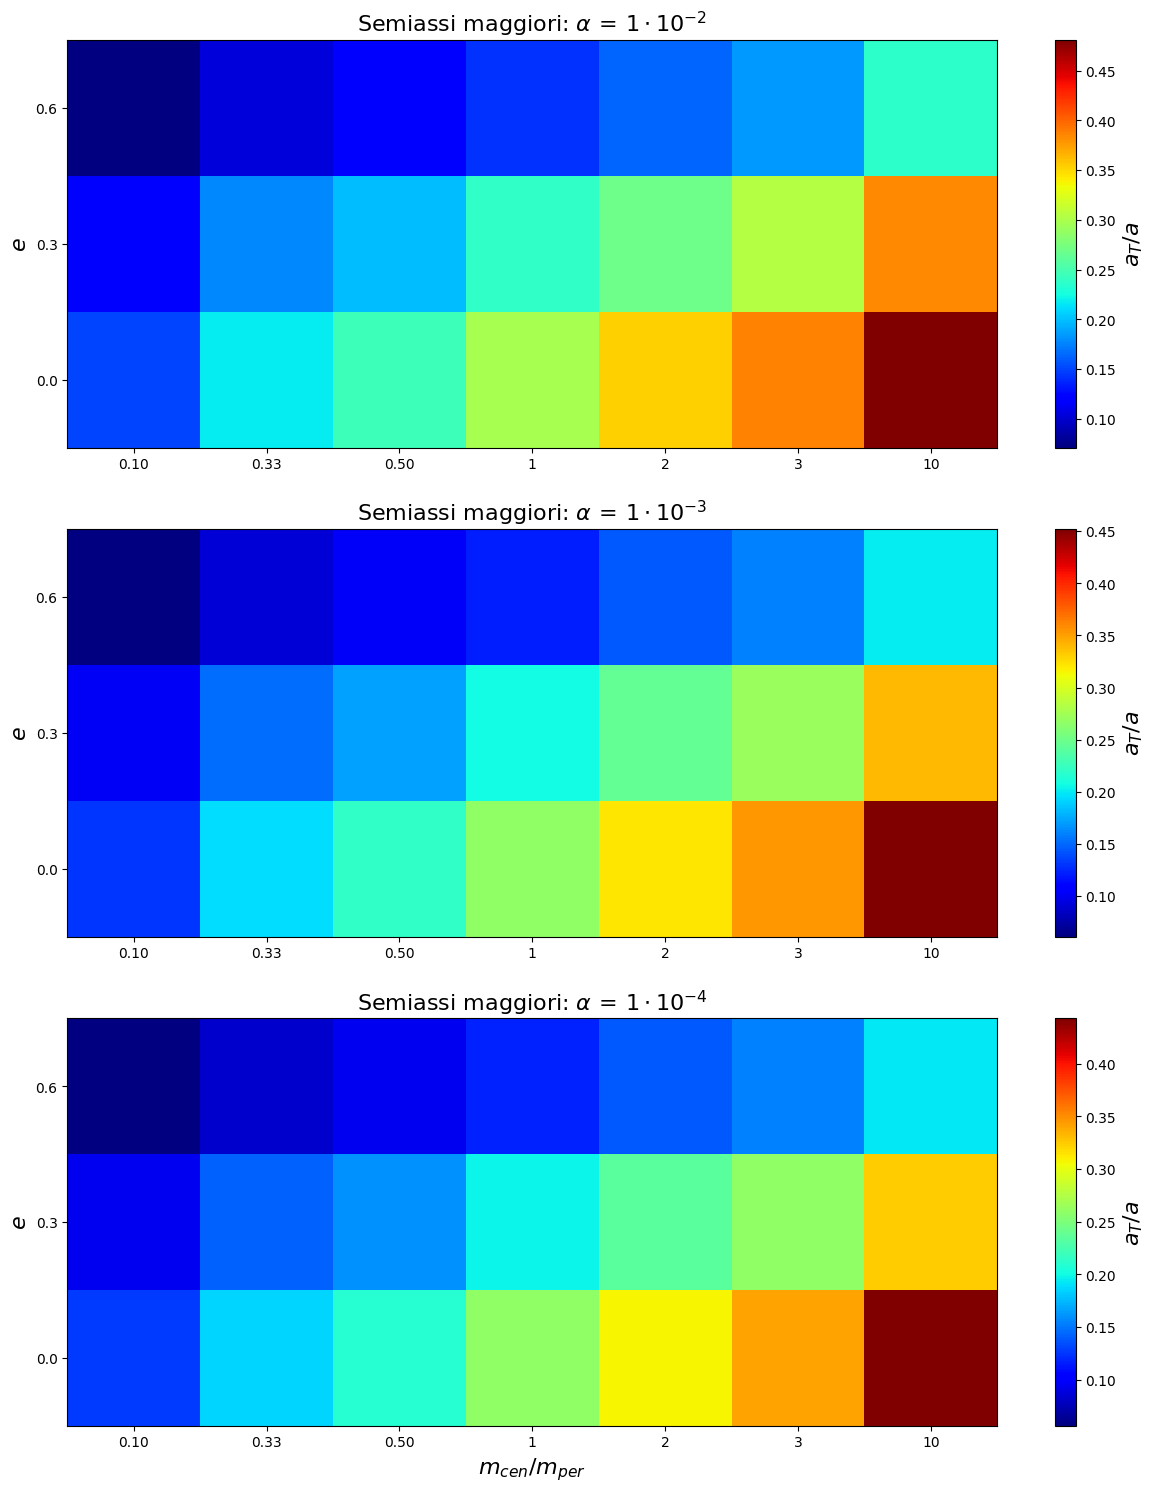

In [23]:
fig, ax = plt.subplots(3, 1, figsize=(15, 18))

# Crea una griglia di valori mass ratios ed eccetricità
mr = np.array([1, 3, 5, 7, 9, 11, 13])
ecc = np.array([1, 3, 5])
mr, ecc = np.meshgrid(mr, ecc)


r_disco = np.array([[0.150, 0.218, 0.245, 0.298, 0.354, 0.387, 0.481], [0.119, 0.177, 0.198, 0.239, 0.269, 0.304, 0.384], [0.071, 0.104, 0.121, 0.142, 0.163, 0.184, 0.237]])

ax0 = ax[0]
# Disegnare il color-plot
cax = ax0.pcolormesh(mr, ecc, r_disco, cmap='jet', vmin = np.min(r_disco), vmax =np.max(r_disco))
cb = plt.colorbar(cax, label=r'$a_T/a$')
cb.set_label(r'$a_T/a$', fontsize=16)
ax0.set_ylabel(r"$e$", fontsize = 16)
ax0.set_title(r"Semiassi maggiori: $\alpha\,=\,1 \cdot 10^{-2}$", fontsize = 16)

ax0.set_xticks(mr[0])
ax0.set_yticks([1, 3, 5])

ax0.set_yticklabels(['0.0', '0.3', '0.6'])
ax0.set_xticklabels(['0.10', '0.33', '0.50', '1', '2', '3', '10'])


r_disco = np.array([[0.131, 0.194, 0.220, 0.267, 0.321, 0.354, 0.452], [0.102, 0.152, 0.171, 0.207, 0.245, 0.271, 0.340], [0.061, 0.091, 0.103, 0.122, 0.144, 0.159, 0.201]])

ax1 = ax[1]
# Disegnare il color-plot
cax = ax1.pcolormesh(mr, ecc, r_disco, cmap='jet', vmin = np.min(r_disco), vmax =np.max(r_disco))
cb = plt.colorbar(cax, label=r'$a_T/a$')
cb.set_label(r'$a_T/a$', fontsize=16)
ax1.set_ylabel(r"$e$", fontsize = 16)
ax1.set_title(r"Semiassi maggiori: $\alpha\,=\,1 \cdot 10^{-3}$", fontsize = 16)

ax1.set_xticks(mr[0])
ax1.set_yticks([1, 3, 5])

ax1.set_yticklabels(['0.0', '0.3', '0.6'])
ax1.set_xticklabels(['0.10', '0.33', '0.50', '1', '2', '3', '10'])


r_disco = np.array([[0.127, 0.185, 0.209, 0.259, 0.307, 0.341, 0.443], [0.095, 0.141, 0.159, 0.198, 0.234, 0.259, 0.324], [0.056, 0.083, 0.094, 0.117, 0.138, 0.153, 0.193]])

ax2 = ax[2]
# Disegnare il color-plot
cax = ax2.pcolormesh(mr, ecc, r_disco, cmap='jet', vmin = np.min(r_disco), vmax =np.max(r_disco))
cb = plt.colorbar(cax, label=r'$a_T/a$')
cb.set_label(r'$a_T/a$', fontsize=16)
ax2.set_xlabel(r"$m_{cen}/m_{per}$", fontsize = 16)
ax2.set_ylabel(r"$e$", fontsize = 16)
ax2.set_title(r"Semiassi maggiori: $\alpha\,=\,1 \cdot 10^{-4}$", fontsize = 16)

ax2.set_xticks(mr[0])
ax2.set_yticks([1, 3, 5])

ax2.set_yticklabels(['0.0', '0.3', '0.6'])
ax2.set_xticklabels(['0.10', '0.33', '0.50', '1', '2', '3', '10'])

plt.show()

<center>

# <span style="color:blue;"> Raggi disco: alfa 2 </span>

<center>

In [4]:
mu = np.array([1.0/11.0, 1.0/4.0, 1.0/3.0, 1.0/2.0, 1.0/1.5, 3.0/4.0, 1.0/1.1])
mr = np.array([0.1, 0.33, 0.5, 1.0, 2.0, 3.0, 10.0])

gamma = 0.88
delta = 0.01

y_ecc = np.array([0.0, 0.3, 0.6])

#Interpolato su Reynholds
alfa = -np.array([0.809, 0.807, 0.802, 0.797, 0.766, 0.757, 0.685])
beta = np.array([0.919, 0.925, 0.918, 0.893, 0.873, 0.845, 0.783])

#Raggi Eggleton
rag_egg = np.zeros(len(mr))
for i in range(0, len(rag_egg)):
    rag_egg[i] = (0.49 * pow(mr[i], 2.0/3.0))/(0.6 * pow(mr[i], 2.0/3.0) + math.log(1 + pow(mr[i], 1.0/3.0)))

sax_tr = np.zeros((len(y_ecc), len(mu)))

for i in range(0, len(y_ecc)):
    for j in range(0, len(mu)):
        sax_tr[i, j] = rag_egg[j] * (alfa[j] * pow(y_ecc[i], beta[j]) + gamma * pow(mu[j], delta))

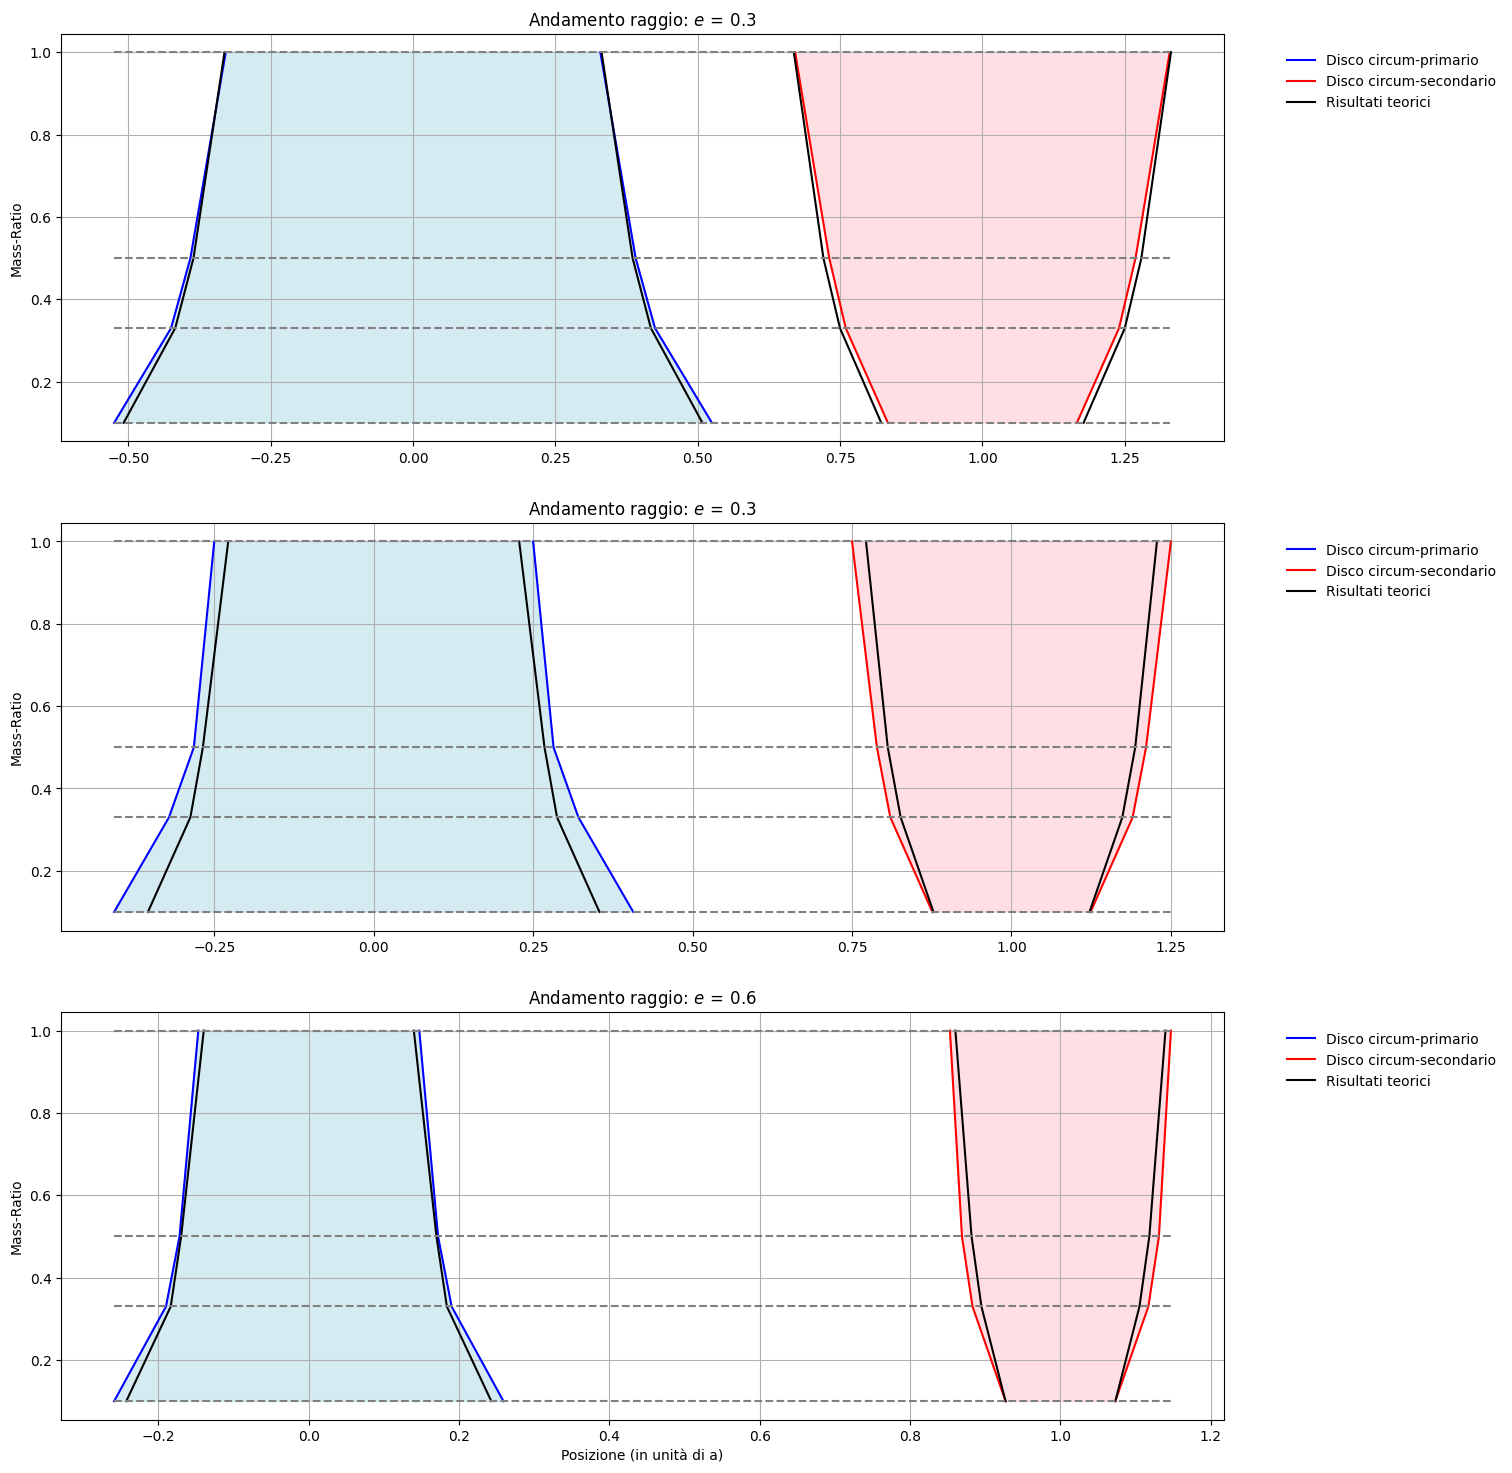

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(15, 18))

mass_ratio = np.array([0.1, 0.33, 0.5, 1])
x = np.zeros(4)
x_teo = np.zeros(4)


ax1 = ax[0]

for i in range(0, len(mass_ratio)):
    if i<2: 
        if i==0:
            for j in range(0, len(mass_ratio)):
                x_teo[j] = -sax_tr[0, 6-j]

            x = -np.array([0.525, 0.425, 0.391, 0.329])
            ax1.plot(x, mass_ratio, color = 'blue', label = 'Disco circum-primario')
            ax1.plot(x_teo, mass_ratio, color = 'black')

        else:
            for j in range(0, len(mass_ratio)):
                x_teo[j] = sax_tr[0, 6-j]

            x = np.array([0.525, 0.425, 0.391, 0.329])
            ax1.plot(x, mass_ratio, color = 'blue')
            ax1.plot(x_teo, mass_ratio, color = 'black')

    
    else:
        if i==2:
            for j in range(0, len(mass_ratio)):
                x_teo[j] = 1-sax_tr[0, j]

            x = np.array([1-0.166, 1-0.240, 1-0.269, 1-0.329])
            ax1.plot(x, mass_ratio, color = 'red', label = 'Disco circum-secondario')
            ax1.plot(x_teo, mass_ratio, color = 'black')

        else:
            for j in range(0, len(mass_ratio)):
                x_teo[j] = 1+sax_tr[0, j]

            x = np.array([1+0.166, 1+0.240, 1+0.269, 1+0.329])
            ax1.plot(x, mass_ratio, color = 'red')
            ax1.plot(x_teo, mass_ratio, color = 'black', label = 'Risultati teorici')


for i in range(0, len(mass_ratio)):
    x = np.array([-0.525, 1+0.329])
    y = np.array([mass_ratio[i], mass_ratio[i]])

    ax1.plot(x, y, color = 'grey', linestyle = '--')
    

#Riempio le regioni da colorare
#Devo prima di tutto specificare quali siano i bordi della figura

#Regione disco circum-primario
x_fill = np.zeros(9)
y_fill = np.zeros(9)

x_fill = np.array([-0.525, -0.425, -0.391, -0.329, 0.329, 0.391, 0.425, 0.525, -0.525])
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
ax1.fill(x_fill, y_fill, color='lightblue', alpha=0.5)

x_fill = np.array([1-0.166, 1-0.240, 1-0.269, 1-0.329, 1+0.329, 1+0.269, 1+0.240, 1+0.166, 1-0.166])
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
ax1.fill(x_fill, y_fill, color='pink', alpha=0.5)



ax1.set_title(r'Andamento raggio: $e\,=\,0.3$')
ax1.set_ylabel('Mass-Ratio')
ax1.legend(loc=(1.05, 0.8), frameon=False)
ax1.grid(True)





ax1 = ax[1]

for i in range(0, len(mass_ratio)):
    if i<2: 
        if i==0:
            for j in range(0, len(mass_ratio)):
                x_teo[j] = -sax_tr[1, 6-j]

            x = -np.array([0.407, 0.321, 0.282, 0.250])
            ax1.plot(x, mass_ratio, color = 'blue', label = 'Disco circum-primario')
            ax1.plot(x_teo, mass_ratio, color = 'black')

        else:
            for j in range(0, len(mass_ratio)):
                x_teo[j] = sax_tr[1, 6-j]

            x = np.array([0.407, 0.321, 0.282, 0.250])
            ax1.plot(x, mass_ratio, color = 'blue')
            ax1.plot(x_teo, mass_ratio, color = 'black')

    
    else:
        if i==2:
            for j in range(0, len(mass_ratio)):
                x_teo[j] = 1-sax_tr[1, j]

            x = np.array([1-0.124, 1-0.190, 1-0.211, 1-0.250])
            ax1.plot(x, mass_ratio, color = 'red', label = 'Disco circum-secondario')
            ax1.plot(x_teo, mass_ratio, color = 'black')

        else:
            for j in range(0, len(mass_ratio)):
                x_teo[j] = 1+sax_tr[1, j]

            x = np.array([1+0.124, 1+0.190, 1+0.211, 1+0.250])
            ax1.plot(x, mass_ratio, color = 'red')
            ax1.plot(x_teo, mass_ratio, color = 'black', label = 'Risultati teorici')


for i in range(0, len(mass_ratio)):
    x = np.array([-0.407, 1+0.250])
    y = np.array([mass_ratio[i], mass_ratio[i]])

    ax1.plot(x, y, color = 'grey', linestyle = '--')
    

#Riempio le regioni da colorare
#Devo prima di tutto specificare quali siano i bordi della figura

#Regione disco circum-primario
x_fill = np.zeros(9)
y_fill = np.zeros(9)

x_fill = np.array([-0.407, -0.321, -0.282, -0.250, 0.250, 0.282, 0.321, 0.407, -0.407])
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
ax1.fill(x_fill, y_fill, color='lightblue', alpha=0.5)

x_fill = np.array([1-0.124, 1-0.190, 1-0.211, 1-0.250, 1+0.250, 1+0.211, 1+0.190, 1+0.124, 1-0.124])
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
ax1.fill(x_fill, y_fill, color='pink', alpha=0.5)



ax1.set_title(r'Andamento raggio: $e\,=\,0.3$')
ax1.set_ylabel('Mass-Ratio')
ax1.legend(loc=(1.05, 0.8), frameon=False)
ax1.grid(True)






ax2 = ax[2]

for i in range(0, len(mass_ratio)):
    if i<2: 
        if i==0:
            for j in range(0, len(mass_ratio)):
                x_teo[j] = -sax_tr[2, 6-j]

            x = -np.array([0.259, 0.190, 0.172, 0.147])
            ax2.plot(x, mass_ratio, color = 'blue', label = 'Disco circum-primario')
            ax2.plot(x_teo, mass_ratio, color = 'black')

        else:
            for j in range(0, len(mass_ratio)):
                x_teo[j] = sax_tr[2, 6-j]

            x = np.array([0.259, 0.190, 0.172, 0.147])
            ax2.plot(x, mass_ratio, color = 'blue')
            ax2.plot(x_teo, mass_ratio, color = 'black')

    
    else:
        if i==2:
            for j in range(0, len(mass_ratio)):
                x_teo[j] = 1-sax_tr[2, j]

            x = np.array([1-0.073, 1-0.117, 1-0.131, 1-0.147])
            ax2.plot(x, mass_ratio, color = 'red', label = 'Disco circum-secondario')
            ax2.plot(x_teo, mass_ratio, color = 'black')

        else:
            for j in range(0, len(mass_ratio)):
                x_teo[j] = 1+sax_tr[2, j]

            x = np.array([1+0.073, 1+0.117, 1+0.131, 1+0.147])
            ax2.plot(x, mass_ratio, color = 'red')
            ax2.plot(x_teo, mass_ratio, color = 'black', label = 'Risultati teorici')


for i in range(0, len(mass_ratio)):
    x = np.array([-0.259, 1+0.147])
    y = np.array([mass_ratio[i], mass_ratio[i]])

    ax2.plot(x, y, color = 'grey', linestyle = '--')
    

#Riempio le regioni da colorare
#Devo prima di tutto specificare quali siano i bordi della figura

#Regione disco circum-primario
x_fill = np.zeros(9)
y_fill = np.zeros(9)

x_fill = np.array([-0.259, -0.190, -0.172, -0.147, 0.147, 0.172, 0.190, 0.259, -0.259])
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
ax2.fill(x_fill, y_fill, color='lightblue', alpha=0.5)

x_fill = np.array([1-0.073, 1-0.117, 1-0.131, 1-0.147, 1+0.147, 1+0.131, 1+0.117, 1+0.073, 1-0.073])
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
ax2.fill(x_fill, y_fill, color='pink', alpha=0.5)



ax2.set_title(r'Andamento raggio: $e\,=\,0.6$')
ax2.set_ylabel('Mass-Ratio')
ax2.set_xlabel('Posizione (in unità di a)')
ax2.legend(loc=(1.05, 0.8), frameon=False)
ax2.grid(True)


plt.show()

<center>

# <span style="color:blue;"> Confronto per presentazione </span>

<center>

In [9]:
mu = np.array([1.0/11.0, 1.0/4.0, 1.0/3.0, 1.0/2.0, 1.0/1.5, 3.0/4.0, 1.0/1.1])
mr = np.array([0.1, 0.33, 0.5, 1.0, 2.0, 3.0, 10.0])

gamma = 0.88
delta = 0.01

y_ecc = np.array([0.0, 0.3, 0.6])

#Interpolato su Reynholds
alfa = - np.array([0.871, 0.823, 0.823, 0.813, 0.806, 0.795, 0.758])
beta = np.array([0.761, 0.775, 0.767, 0.740, 0.719, 0.695, 0.636])

#Raggi Eggleton
rag_egg = np.zeros(len(mr))
for i in range(0, len(rag_egg)):
    rag_egg[i] = (0.49 * pow(mr[i], 2.0/3.0))/(0.6 * pow(mr[i], 2.0/3.0) + math.log(1 + pow(mr[i], 1.0/3.0)))

sax_tr = np.zeros((len(y_ecc), len(mu)))

for i in range(0, len(y_ecc)):
    for j in range(0, len(mu)):
        sax_tr[i, j] = rag_egg[j] * (alfa[j] * pow(y_ecc[i], beta[j]) + gamma * pow(mu[j], delta))

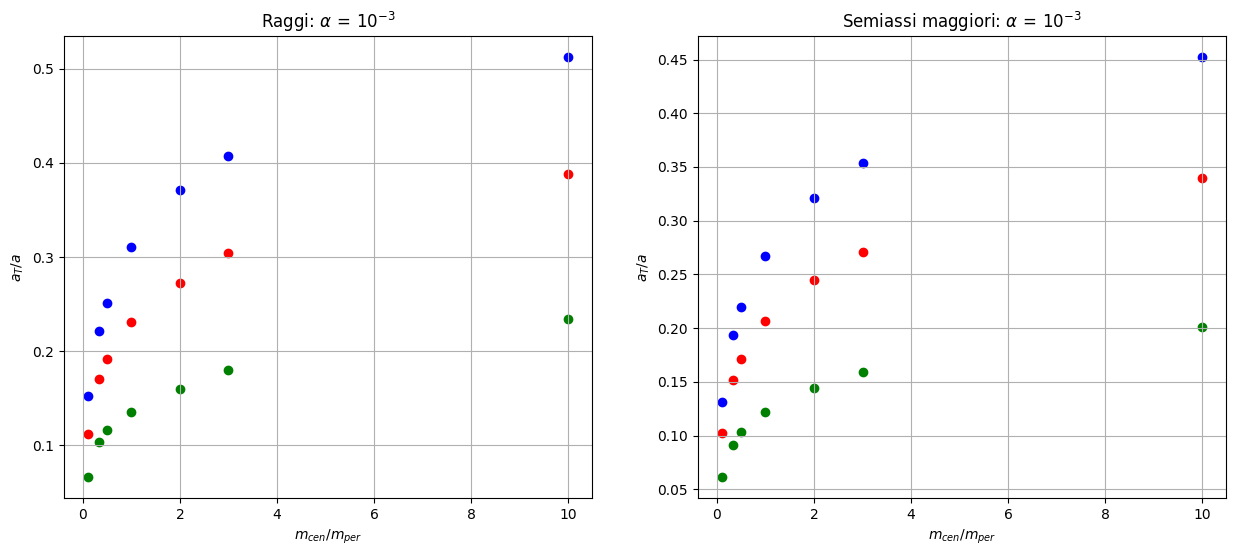

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

r_disco = np.array([[0.152, 0.222, 0.251, 0.311, 0.371, 0.407, 0.512], [0.112, 0.171, 0.192, 0.231, 0.272, 0.304, 0.388], [0.066, 0.104, 0.116, 0.135, 0.160, 0.180, 0.234]])
sax_disco = np.array([[0.131, 0.194, 0.220, 0.267, 0.321, 0.354, 0.452], [0.102, 0.152, 0.171, 0.207, 0.245, 0.271, 0.340], [0.061, 0.091, 0.103, 0.122, 0.144, 0.159, 0.201]])

mass_r_plot = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

ax0 = ax[0]
ax0.scatter(mass_r_plot, r_disco[0, :], color = 'blue', marker='o', label = r'$e\,=\,0.0$')
ax0.scatter(mass_r_plot, r_disco[1, :], color = 'red', marker='o', label = r'$e\,=\,0.3$')
ax0.scatter(mass_r_plot, r_disco[2, :], color = 'green', marker='o', label = r'$e\,=\,0.6$')
ax0.set_xlabel(r'$m_{cen}/m_{per}$')
ax0.set_title(r'Raggi: $\alpha\,=\,10^{-3}$')
ax0.set_ylabel(r'$a_T/a$')
ax0.grid(True)


ax1 = ax[1]
ax1.scatter(mass_r_plot, sax_disco[0, :], color = 'blue', marker='o', label = r'$e\,=\,0.0$')
ax1.scatter(mass_r_plot, sax_disco[1, :], color = 'red', marker='o', label = r'$e\,=\,0.3$')
ax1.scatter(mass_r_plot, sax_disco[2, :], color = 'green', marker='o', label = r'$e\,=\,0.6$')
ax1.set_xlabel(r'$m_{cen}/m_{per}$')
ax1.set_title(r'Semiassi maggiori: $\alpha\,=\,10^{-3}$')
ax1.set_ylabel(r'$a_T/a$')
ax1.grid(True)

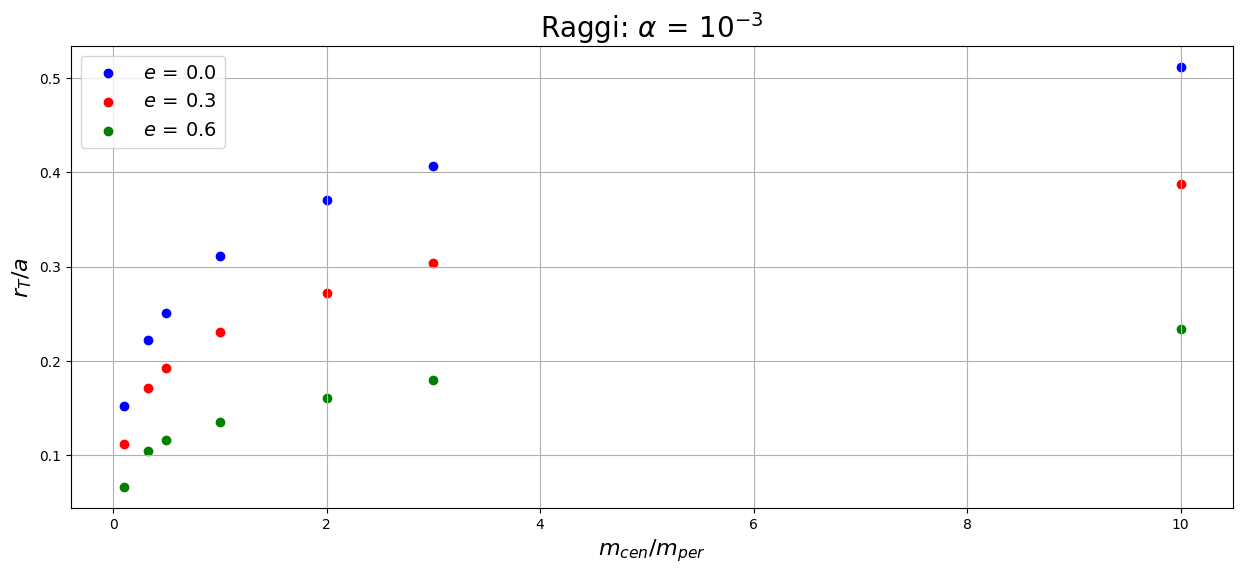

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

r_disco = np.array([[0.152, 0.222, 0.251, 0.311, 0.371, 0.407, 0.512], [0.112, 0.171, 0.192, 0.231, 0.272, 0.304, 0.388], [0.066, 0.104, 0.116, 0.135, 0.160, 0.180, 0.234]])
sax_disco = np.array([[0.131, 0.194, 0.220, 0.267, 0.321, 0.354, 0.452], [0.102, 0.152, 0.171, 0.207, 0.245, 0.271, 0.340], [0.061, 0.091, 0.103, 0.122, 0.144, 0.159, 0.201]])

mass_r_plot = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

ax0 = ax
ax0.scatter(mass_r_plot, r_disco[0, :], color = 'blue', marker='o', label = r'$e\,=\,0.0$')
ax0.scatter(mass_r_plot, r_disco[1, :], color = 'red', marker='o', label = r'$e\,=\,0.3$')
ax0.scatter(mass_r_plot, r_disco[2, :], color = 'green', marker='o', label = r'$e\,=\,0.6$')
ax0.set_xlabel(r'$m_{cen}/m_{per}$', fontsize = 16)
ax0.set_title(r'Raggi: $\alpha\,=\,10^{-3}$',  fontsize = 20)
ax0.set_ylabel(r'$r_T/a$', fontsize = 16)
ax0.legend(loc = 'best', fontsize = 14)
ax0.grid(True)

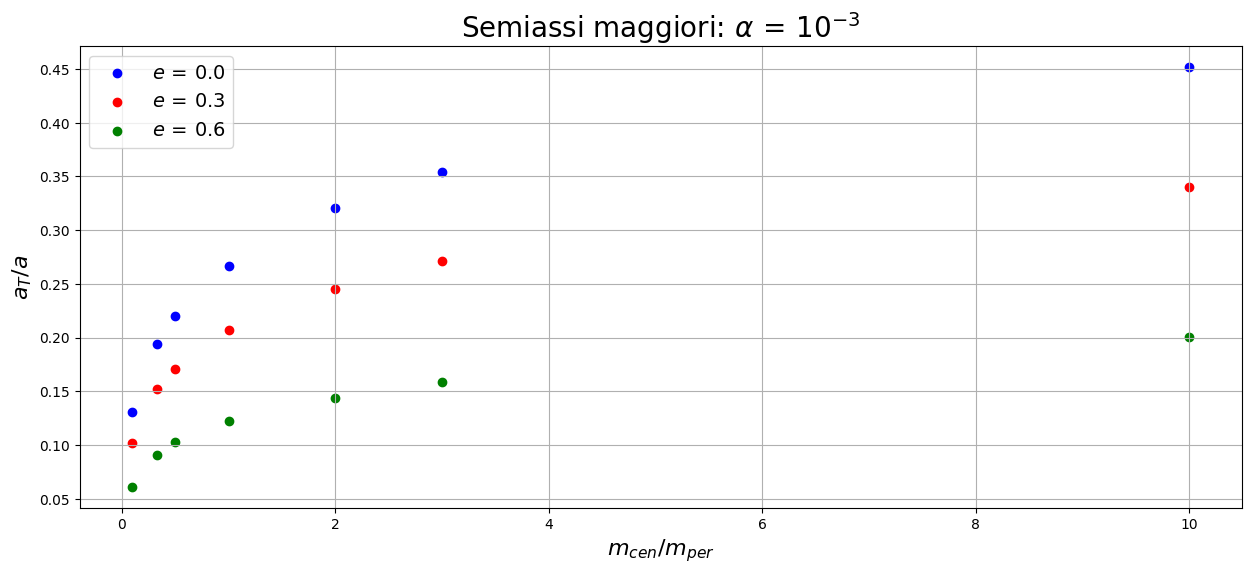

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

r_disco = np.array([[0.152, 0.222, 0.251, 0.311, 0.371, 0.407, 0.512], [0.112, 0.171, 0.192, 0.231, 0.272, 0.304, 0.388], [0.066, 0.104, 0.116, 0.135, 0.160, 0.180, 0.234]])
sax_disco = np.array([[0.131, 0.194, 0.220, 0.267, 0.321, 0.354, 0.452], [0.102, 0.152, 0.171, 0.207, 0.245, 0.271, 0.340], [0.061, 0.091, 0.103, 0.122, 0.144, 0.159, 0.201]])

mass_r_plot = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

ax0 = ax
ax0.scatter(mass_r_plot, sax_disco[0, :], color = 'blue', marker='o', label = r'$e\,=\,0.0$')
ax0.scatter(mass_r_plot, sax_disco[1, :], color = 'red', marker='o', label = r'$e\,=\,0.3$')
ax0.scatter(mass_r_plot, sax_disco[2, :], color = 'green', marker='o', label = r'$e\,=\,0.6$')
ax0.set_xlabel(r'$m_{cen}/m_{per}$', fontsize = 16)
ax0.set_title(r'Semiassi maggiori: $\alpha\,=\,10^{-3}$',  fontsize = 20)
ax0.set_ylabel(r'$a_T/a$', fontsize = 16)
ax0.legend(loc = 'best', fontsize = 14)
ax0.grid(True)

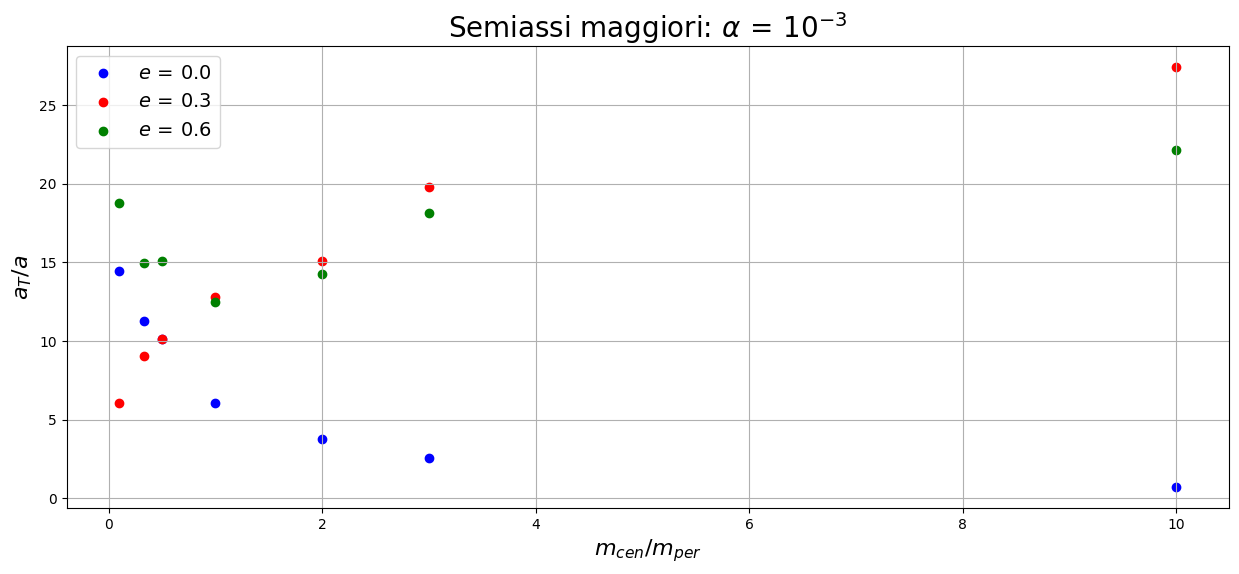

In [11]:
per  = abs(r_disco - sax_tr)/sax_tr * 100

fig, ax = plt.subplots(1, 1, figsize=(15, 6))

mass_r_plot = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

ax0 = ax
ax0.scatter(mass_r_plot, per[0, :], color = 'blue', marker='o', label = r'$e\,=\,0.0$')
ax0.scatter(mass_r_plot, per[1, :], color = 'red', marker='o', label = r'$e\,=\,0.3$')
ax0.scatter(mass_r_plot, per[2, :], color = 'green', marker='o', label = r'$e\,=\,0.6$')
ax0.set_xlabel(r'$m_{cen}/m_{per}$', fontsize = 16)
ax0.set_title(r'Semiassi maggiori: $\alpha\,=\,10^{-3}$',  fontsize = 20)
ax0.set_ylabel(r'$a_T/a$', fontsize = 16)
ax0.legend(loc = 'best', fontsize = 14)
ax0.grid(True)